#Employee Salary prediction assignment.
Objective: Understand salary determinants based on experience and qualifications. The objective of this analysis is to explore the Salary Data.csv dataset to understand the factors influencing salaries and build a predictive model. The goal is to identify key drivers of salary, such as education level, job title, years of experience, and other demographic features, and to develop a regression model that can predict salaries based on these inputs

In [1]:
# Import necessary libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ignore all warnings
warnings.filterwarnings("ignore")
# Ignore specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="This is a specific warning to ignore")

In [3]:
df=pd.read_csv("/content/archive (2).zip")

# Display basic information about the dataset
print("Dataset Overview:")
print(df.head())
print("--------------------------------------------------")
print("\nDataset shape:")
print(df.shape)
print("\nDataset Info:")
print(df.info())
print("--------------------------------------------------")
print("\nSummary Statistics:")
print(df.describe())
print("--------------------------------------------------")
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Overview:
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
--------------------------------------------------

Dataset shape:
(375, 6)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3

In [4]:
# Define numerical features
numerical_features = ['Age', 'Years of Experience', 'Salary']

# Print missing values BEFORE applying the median imputation
print("Missing Values BEFORE Imputation:")
for col in numerical_features:
    missing_count = df[col].isnull().sum()
    print(f"{col}: {missing_count} missing values")
print("\n")
# Handle missing values by filling with the median
for col in numerical_features:
    if df[col].isnull().sum() > 0:
        print(f"Filling {col} with median: {df[col].median()}")
        df[col].fillna(df[col].median(), inplace=True)

# Print missing values AFTER applying the median imputation
print("\nMissing Values AFTER Imputation:")
for col in numerical_features:
    missing_count = df[col].isnull().sum()
    print(f"{col}: {missing_count} missing values")

Missing Values BEFORE Imputation:
Age: 2 missing values
Years of Experience: 2 missing values
Salary: 2 missing values


Filling Age with median: 36.0
Filling Years of Experience with median: 9.0
Filling Salary with median: 95000.0

Missing Values AFTER Imputation:
Age: 0 missing values
Years of Experience: 0 missing values
Salary: 0 missing values


In [5]:
categorical_features = ['Gender', 'Education Level', 'Job Title']

# Print missing values BEFORE applying the mode imputation
print("Missing Values BEFORE Imputation:")
for col in categorical_features:
    missing_count = df[col].isnull().sum()
    print(f"{col}: {missing_count} missing values")
print("\n")
# Handle missing values by filling with the mode
for col in categorical_features:
    if df[col].isnull().sum() > 0:
        print(f"Filling {col} with mode: {df[col].mode()[0]}")
        df[col].fillna(df[col].mode()[0], inplace=True)

# Print missing values AFTER applying the mode imputation
print("\nMissing Values AFTER Imputation:")
for col in categorical_features:
    missing_count = df[col].isnull().sum()
    print(f"{col}: {missing_count} missing values")

Missing Values BEFORE Imputation:
Gender: 2 missing values
Education Level: 2 missing values
Job Title: 2 missing values


Filling Gender with mode: Male
Filling Education Level with mode: Bachelor's
Filling Job Title with mode: Director of Marketing

Missing Values AFTER Imputation:
Gender: 0 missing values
Education Level: 0 missing values
Job Title: 0 missing values



Visualizing Numerical Feature Distributions:


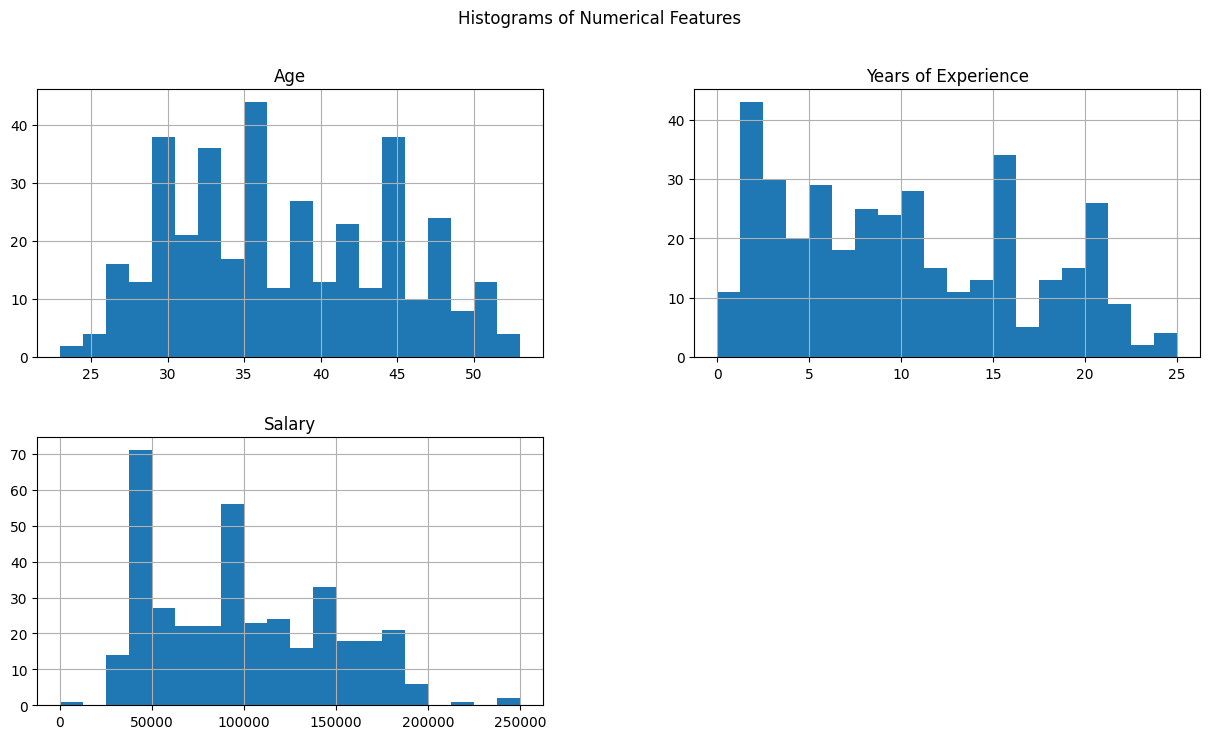

In [6]:
print("\nVisualizing Numerical Feature Distributions:")
df[numerical_features].hist(bins=20, figsize=(15, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

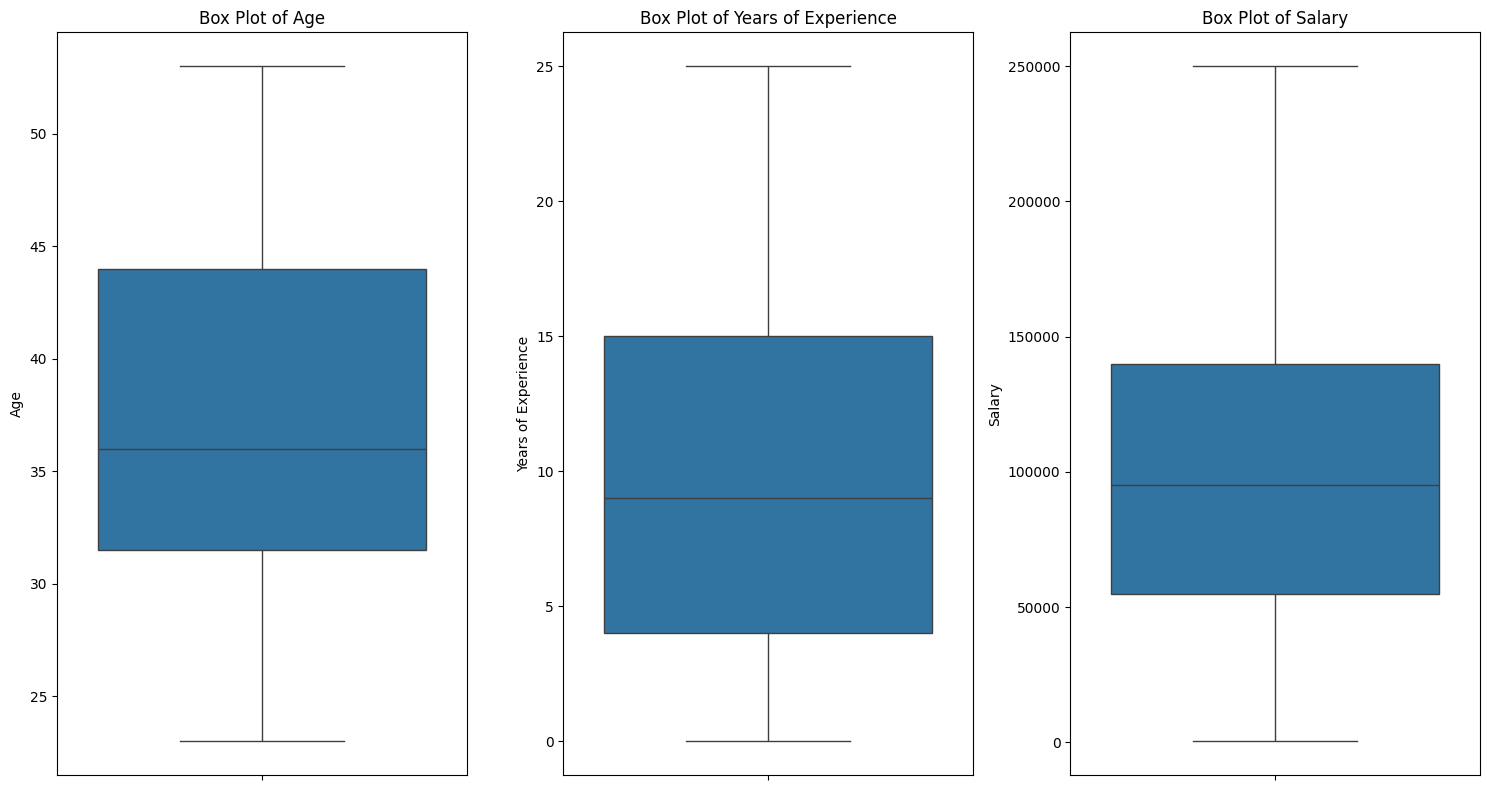

In [7]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df[col])
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

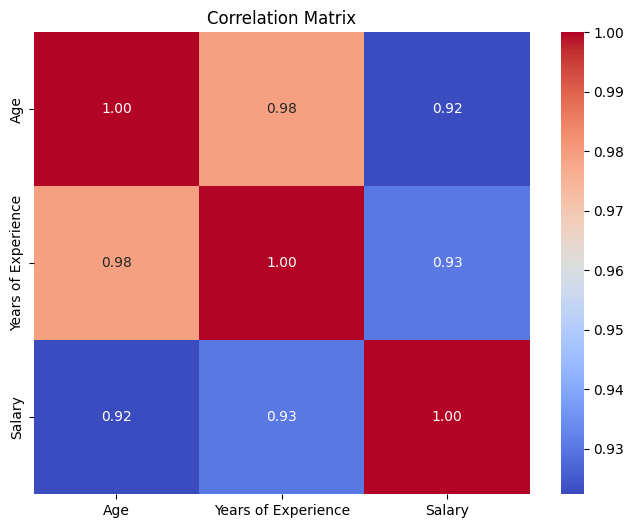

In [8]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


Analyzing Categorical Features:

Frequency Table for Gender:
Gender
Male      196
Female    179
Name: count, dtype: int64


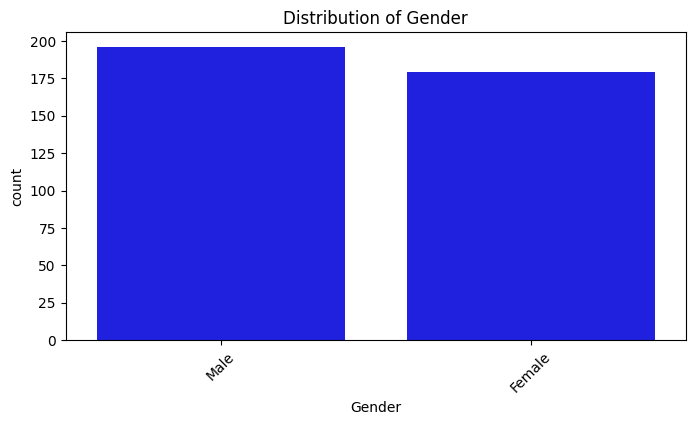


Frequency Table for Education Level:
Education Level
Bachelor's    226
Master's       98
PhD            51
Name: count, dtype: int64


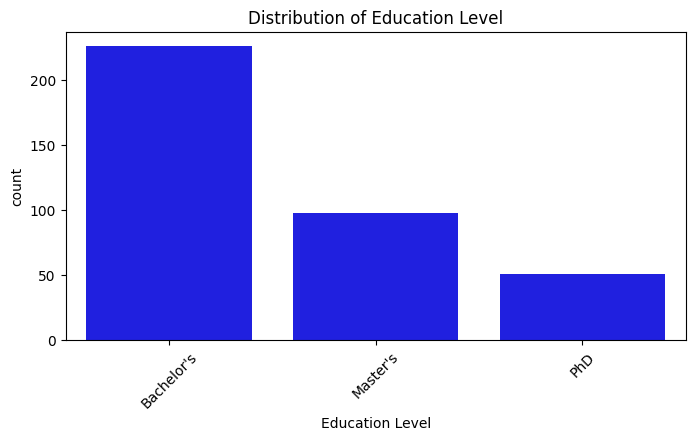


Frequency Table for Job Title:
Job Title
Director of Marketing             14
Director of Operations            11
Senior Business Analyst           10
Senior Marketing Manager           9
Senior Marketing Analyst           9
                                  ..
Junior Social Media Specialist     1
Junior Operations Coordinator      1
Senior HR Specialist               1
Director of HR                     1
Junior Financial Advisor           1
Name: count, Length: 174, dtype: int64


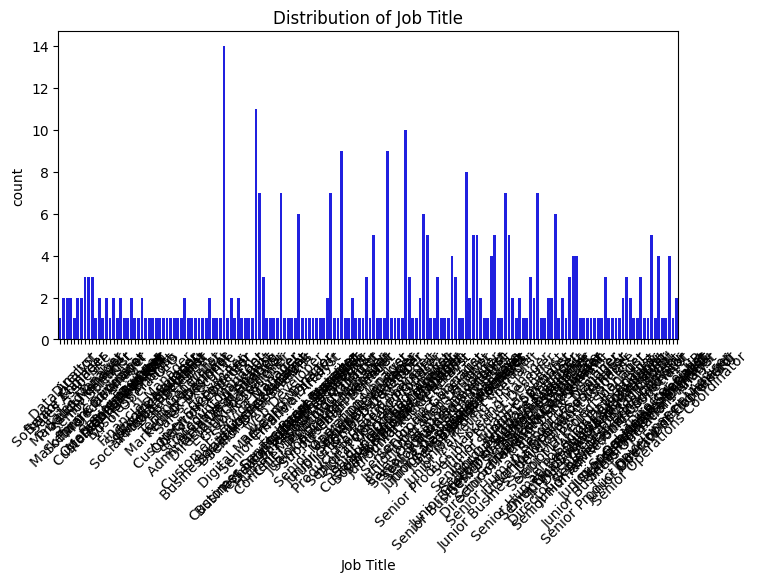

In [19]:
print("\nAnalyzing Categorical Features:")
for column in categorical_features:
    print(f"\nFrequency Table for {column}:")
    print(df[column].value_counts())

    # Bar plot for categorical variables with red color
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=column, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()


In [11]:

# Encode categorical variables using one-hot encoding
# Remove 'Salary' from numerical_features
numerical_features = ['Age', 'Years of Experience']
# Handle unknown categories in the OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

In [12]:
target = 'Salary'
features = df.drop(columns=[target])

# Split the data into training and testing sets
X = features
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Step 4: Build and Train the Linear Regression Model

# Create a pipeline with preprocessing and regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [14]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Years of Experience']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gender', 'Education Level',
                                                   'Job Title'])])),
                ('regressor', LinearRegression())])

In [15]:
y_pred = model.predict(X_test)
y_pred

array([126836.72949316,  83482.12808932, 105963.40458051, 100000.46151152,
       132621.09413602, 180346.05840929, 128982.57051555, 119165.78126654,
        45775.07097568,  82089.22834561, 134747.17906067, 125877.2430845 ,
        46922.30846515,  86757.27159478,  56752.85034604, 153598.05975793,
        59860.18988842,  46486.54563129,  96108.76812103,  76691.13093122,
       118310.01788064, 111293.85495078, 121163.9640749 ,  52863.16610753,
       101681.74627871,  58423.26516873, 194300.7493607 , 124999.15357613,
       151248.77817105, 155184.29150372,  46431.6742504 , 114734.79020907,
        51894.65448682, 144630.94243978,  94667.50640491,  29596.6882276 ,
       168926.35829524,  50204.65676936,  41033.57683602,  53188.92005996,
        46354.8646836 ,  90438.62647954, 134930.00393768, 174295.00849119,
        45619.11680269, 141329.18381567,  92079.04563758,  47331.54449002,
        48310.03321561,  44741.67653294, 100696.93186447,  97842.90934289,
        85955.54606387,  

In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 431719793.07
R-squared (R2): 0.82


In [17]:

coefficients = pd.DataFrame({
    'Feature': model.named_steps['preprocessor'].get_feature_names_out(),  # Get feature names from preprocessor
    'Coefficient': model.named_steps['regressor'].coef_  # Access coef_ from the 'regressor' step
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

                                               Feature    Coefficient
9                    cat__Job Title_Chief Data Officer  101128.867442
10             cat__Job Title_Chief Technology Officer   99266.805895
150                       cat__Job Title_VP of Finance   77205.706442
151                    cat__Job Title_VP of Operations   67205.706453
81                  cat__Job Title_Operations Director   66602.916157
..                                                 ...            ...
34                    cat__Job Title_Event Coordinator  -20422.327715
148                 cat__Job Title_Training Specialist  -21862.086923
5              cat__Job Title_Administrative Assistant  -28352.962449
79                       cat__Job Title_Office Manager  -29224.812005
49   cat__Job Title_Junior Business Operations Analyst  -29391.981181

[153 rows x 2 columns]


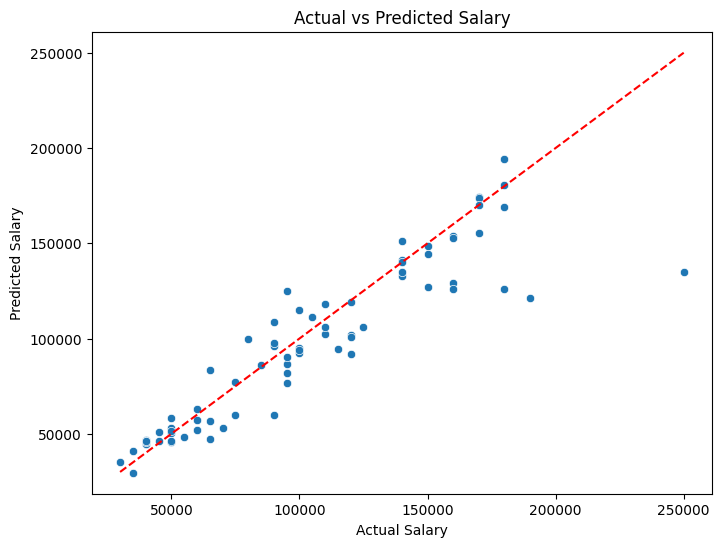

In [18]:
# Visualize actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

Expected Output EDA Insights : Salary is positively correlated with Years of Experience and Age. Higher education levels (e.g., Master's, PhD) tend to correlate with higher salaries. Certain job titles (e.g., Director, Senior roles) are associated with significantly higher salaries. Preprocessed Dataset : Categorical variables are one-hot encoded. Numerical features are standardized. Model Evaluation : The Mean Squared Error (MSE) and R-squared (R²) provide insights into the model's predictive performance. A scatter plot visualizes how well the model predicts salary.